In [120]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Import Dependencies**

In [121]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import random

**GetDataClass**

In [125]:
class GetDataClass:
  #Creating a constructor
  def __init__(self):
    self.datas = None

  #Function to read data
  def read_data(self):
    path = input("Enter the path of the file: ") 
    if os.path.exists(path):
      self.datas = np.genfromtxt(path, delimiter=',')
      print(self.datas)
    else: 
      print('File path is invalid!')

  #Function to load data from the directory
  def load_data_from_directory(self):
    path_of_directory = input('Enter the path of the directory: ')

    #Raise error when the directory is present
    if not os.path.isdir(path_of_directory):
      print('Invalid path directory!')

    #Getting all files from the directory
    files = [files for files in glob.glob(path_of_directory + str('/*'))]

    #Print all the files
    for i, file in enumerate(files):
      print('{} {}'.format(i+1, file.split('/')[-1]))

    #Asking the user to select a file
    user_choice = int(input('Enter the file number: '))

    #Check whether the file's index is valid or not
    if user_choice < 1 or user_choice > len(files):
      print('The choice is invalid!')

    #Getting file name from the index number
    file_name = files[user_choice-1]

    #Read the csv file
    data = pd.read_csv(file_name)

    #Converting pandas dataframe to numpy array
    data_array = data.to_numpy()
    print(data_array)
    return data_array

  def validate_data(self):
    path_of_directory = input('Enter the path of the directory: ')

    #Raise error when the directory is present
    if not os.path.isdir(path_of_directory):
      print('Invalid path directory!')

    #Getting all files from the directory
    files = [files for files in glob.glob(path_of_directory + str('/*'))]

    #Print all the files
    for i, file in enumerate(files):
      print('{} {}'.format(i+1, file.split('/')[-1]))

    #Asking the user to select a file
    user_choice = int(input('Enter the file number: '))

    #Check whether the file's index is valid or not
    if user_choice < 1 or user_choice > len(files):
      print('The choice is invalid!')

    #Getting file name from the index number
    file_name = files[user_choice-1]

    #Read the csv file
    data = pd.read_csv(file_name)

    #Checking for the NaN values
    if data.isnull().sum().sum() != 0:
      print('There are {} NaN values present in the dataframe'.format(data.isnull().sum().sum()))
      return False

    #Check all the columns for numerical values
    if not all(data.dtypes == 'float64'):
      print('The dataframe contains some decimal values!')
      return True

    #When all the conditions are meet
    print('The dataframe is valid!')
    return True

In [129]:
#Creating object of the class and using the necessary methods
getdata = GetDataClass()
getdata.load_data_from_directory()
getdata.validate_data()

Enter the path of the directory: /content/gdrive/MyDrive/Colab Notebooks
1 d1_pnccd.csv
2 Project2.ipynb
3 project1.ipynb
Enter the file number: 1
[['62 279 1575']
 ['74 154 2211']
 ['74 340 2611']
 ...
 ['380 32 2812']
 ['381 169 1825']
 ['383 173 2517']]
Enter the path of the directory: /content/gdrive/MyDrive/Colab Notebooks
1 d1_pnccd.csv
2 Project2.ipynb
3 project1.ipynb
4 p1.csv
Enter the file number: 4
The dataframe contains some decimal values!


True

**Calculator Class**

In [123]:
class CalculatorClass:
  def __init__(self):
    pass

  #Function to convert units
  def convert_units(self):
    #Asking user for conversion unit
    user_value = float(input('Enter the number you want for conversion: '))
    user_unit = input('Enter the unit of the number (g, kg, F, C, cm, m): ').lower()
    conversion_unit = input('Select the unit to conver the number (g, kg, F, C, cm, m): ').lower()

    #Comparing units and returing respective results
    if user_unit == 'g' and conversion_unit == 'kg':
      return user_value * 0.001
    elif user_unit == 'f' and conversion_unit == 'c':
      return (user_value - 32) * (5/9)
    elif user_unit == 'cm' and conversion_unit == 'm':
      return user_value * 0.01
    elif user_unit == 'kg' and conversion_unit == 'g':
      return user_value * 1000
    elif user_unit == 'c' and conversion_unit == 'f':
      return (user_value * (5/9)) + 32
    elif user_unit == 'm' and conversion_unit == 'cm':
      return user_value * 100
    else:
      print('Invalid conversion unit!')
      return None
    
  #Finding mean
  def find_mean(self):
    array_of_data = map(int,input("Enter the value to data array with comma: ").split(','))
    array_of_data = list(array_of_data)
    return np.mean(array_of_data) #Got idea from my cousin

  #Finding variance
  def find_variance(self):
    array_of_data = map(int,input("Enter the value to data array with comma: ").split(','))
    array_of_data = list(array_of_data)
    return np.var(array_of_data)

  #Finding max number and index of max number
  def find_index_and_max_value(self):
    array_of_data = map(int,input("Enter the value to data array with comma: ").split(','))
    array_of_data = list(array_of_data)
    max_value = np.max(array_of_data)
    max_index = np.argmax(array_of_data)
    return max_value, max_index

  #Finding min number and index of min number
  def find_index_and_min_value(self):
    array_of_data = map(int,input("Enter the value to data array with comma: ").split(','))
    array_of_data = list(array_of_data)
    max_value = np.min(array_of_data)
    max_index = np.argmin(array_of_data)
    return max_value, max_index

  #Main function to accumulate all the functions in one main function
  def main(self):
    start = True
    while start:
      #Asking for user's choise, #Got idea from my cousin
      print("Select a function to use:")
      print("1. Convert units")
      print("2. Find mean")
      print("3. Find variance")
      print("4. Find max value and index")
      print("5. Find min value and index")
      choice = int(input())

      if choice == 1:
        final_result = self.convert_units()
        print('Converted Units: {}'.format(final_result))
      elif choice == 2:
        final_result = self.find_mean()
        print('Mean of array data: {}'.format(final_result))
      elif choice == 3:
        final_result = self.find_variance()
        print('Variance of array data: {}'.format(final_result))
      elif choice == 4:
        final_result = self.find_index_and_max_value()
        print('Maximum value of data array is {} at index {}'.format(final_result[0], final_result[1]))
      elif choice == 5:
        final_result = self.find_index_and_min_value()
        print('Minimum value of data array is {} at index {}'.format(final_result[0], final_result[1]))
      else:
        print('Please enter right number!')

      choice = 0

      que = input('Do you want to continue (c) or exit (e)? ').lower()
      if que == 'c':
        self.main()
      else:
        start = False
      break



In [124]:
#Creating object of the class and using the necessary methods
calculations = CalculatorClass()
calculations.main()

Select a function to use:
1. Convert units
2. Find mean
3. Find variance
4. Find max value and index
5. Find min value and index
1
Enter the number you want for conversion: 100
Enter the unit of the number (g, kg, F, C, cm, m): g
Select the unit to conver the number (g, kg, F, C, cm, m): kg
Converted Units: 0.1
Do you want to continue (c) or exit (e)? c
Select a function to use:
1. Convert units
2. Find mean
3. Find variance
4. Find max value and index
5. Find min value and index
2
Enter the value to data array with comma: 1,2,3
Mean of array data: 2.0
Do you want to continue (c) or exit (e)? c
Select a function to use:
1. Convert units
2. Find mean
3. Find variance
4. Find max value and index
5. Find min value and index
5
Enter the value to data array with comma: 1,2,3,4
Minimum value of data array is 1 at index 0
Do you want to continue (c) or exit (e)? e


**Plot And Simulate Class**

In [130]:
class PlotAndSimulate:
  def __init__(self):
    pass

  #Function to create normal plot
  def plot_normal(self):

    first_num = float(input('Enter the first number to start range for normal distribution: '))
    second_num = float(input('Enter the second number to end range for normal distribution: '))
    num_of_steps = float(input('Enter the number of steps for normal distribution: '))

    # Plot between first number and second number with num_of_steps.
    x_axis = np.arange(first_num, second_num, num_of_steps)

    # Calculating mean and standard deviation
    mean = statistics.mean(x_axis) #Finding mean
    sd = statistics.stdev(x_axis) #Finding standard deviation,#Got help from my cousin
      
    #Plotting normal graph
    plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
    plt.title('Normal Plot')
    plt.show()

  #Function to create scatter plot
  def plot_scatter(self):

    #Asking user for the input
    X = list(map(int,input("Enter the value for X-data array for scatter plot with comma eg.(1,2,3,4,5): ").split(',')))
    y = list(map(int,input("Enter the value for y-data array scatter plot with comma eg.(1,2,3,4,5): ").split(',')))

    #Checking for len of both array
    if len(X) != len(y):
      raise ValueError('Length of both data array must be same. Please re-enter!')

    #Plotting the scatter graph
    plt.scatter(X, y)
    plt.title('Scatter Plot')
    plt.show()
  
  #Function to create random dataset, #Got idea from my cousin
  def choose_random_dataset(self):

    #Asking user for necessary inputs
    first = int(input('Enter first number for random dataset: '))1
    second = int(input('Enter second number for random dataset: '))
    n_samples = int(input('Please select number of samples: '))

    X = []
    y = []
    i = 1

    for i in range(n_samples):
      n = random.randint(first,second)
      X.append(n)

    for i in range(n_samples):
      y.append(i)
      i += 1

    #Dictionary for creating the dataframe
    data = {'Random Dataset':X, 'Index':y}

    #Creating the dataframe
    df = pd.DataFrame(data, columns=['Random Dataset', 'Index'])
    print(df.head())

    mean = statistics.mean(df['Random Dataset'])
    sd = statistics.stdev(df['Random Dataset'])
      
    plt.plot(df['Random Dataset'], norm.pdf(df['Random Dataset'], mean, sd))
    plt.title('Normal Plot')
    plt.show()

    plt.scatter(y, X)
    plt.title('Scatter Plot')
    plt.show()

  #Accumulating all, #Got idea from my cousin
  def main(self):
    #Asking for user's choice
    user_input = int(input('Select a method for simulation\n1. Plot Scatter\n2. Plot Normal\n3. Choose Random Dataset'))

    start = True

    #Using loop until user want to exit the program
    while start:

      if user_input == 1:
        self.plot_scatter()
      elif user_input == 2:
        self.plot_normal()
      else:
        self.choose_random_dataset()
      
      user_input = 0
      print('')
      que = input('Do you want to continue (c) or exit (e)? ').lower()
      print('')

      if que == str('c'):
        self.main()
      else:
        start = False
      break

Select a method for simulation
1. Plot Scatter
2. Plot Normal
3. Choose Random Dataset2
Enter the first number to start range for normal distribution: 10
Enter the second number to end range for normal distribution: 20
Enter the number of steps for normal distribution: 5


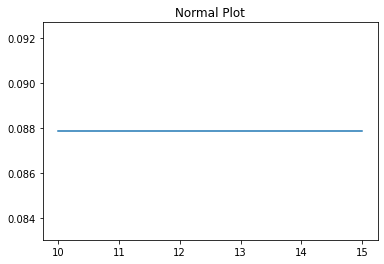


Do you want to continue (c) or exit (e)? c

Select a method for simulation
1. Plot Scatter
2. Plot Normal
3. Choose Random Dataset1
Enter the value for X-data array for scatter plot with comma eg.(1,2,3,4,5): 1,2,3
Enter the value for y-data array scatter plot with comma eg.(1,2,3,4,5): 10,15,30


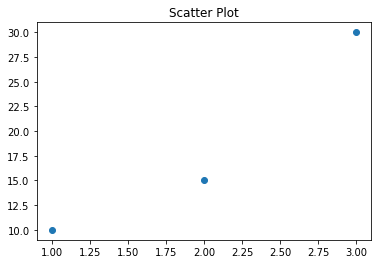


Do you want to continue (c) or exit (e)? c

Select a method for simulation
1. Plot Scatter
2. Plot Normal
3. Choose Random Dataset3
Enter first number for random dataset: 5
Enter second number for random dataset: 10
Please select number of samples: 5
   Random Dataset  Index
0               8      0
1               8      1
2               8      2
3               7      3
4               7      4


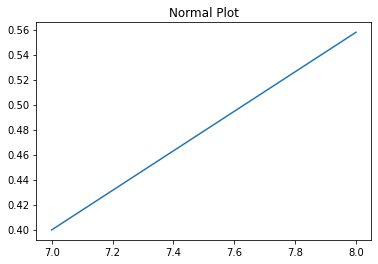

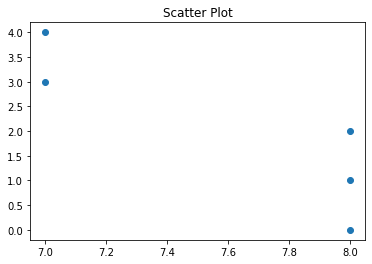


Do you want to continue (c) or exit (e)? c

Select a method for simulation
1. Plot Scatter
2. Plot Normal
3. Choose Random Dataset3
Enter first number for random dataset: 5
Enter second number for random dataset: 10
Please select number of samples: 5
   Random Dataset  Index
0               5      0
1               5      1
2              10      2
3               6      3
4               6      4


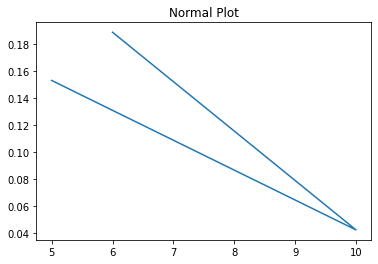

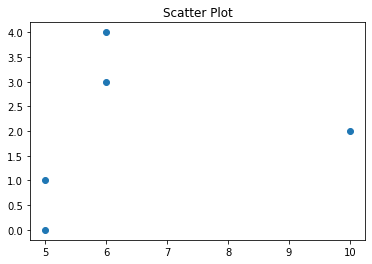


Do you want to continue (c) or exit (e)? e



In [131]:
#Creating object of the class and using the necessary methods
plotandsimulate = PlotAndSimulate()
plotandsimulate.main()